# Flights' Demand
(data extraction)

### Content
1. [Inroduction](#intro)
2. [General Information](#gen)
3. [Analyze](#analyze)
4. [Conclusion](#conclusion)


In [ ]:
# *Working with a data*
# Was done in course environment

# SELECT
#     EXTRACT(week FROM flights.departure_time) AS week_number,
#     COUNT(ticket_flights.ticket_no) AS ticket_amount,
#     EXTRACT(week FROM festivals.festival_date) AS festival_week,
#     festivals.festival_name AS festival_name
# FROM
#     flights LEFT JOIN ticket_flights ON flights.flight_id = ticket_flights.flight_id
#     LEFT JOIN airports ON flights.arrival_airport = airports.airport_code
#     LEFT JOIN festivals ON airports.city = festivals.festival_city AND EXTRACT(week FROM flights.departure_time) = EXTRACT(week FROM festivals.festival_date)
# WHERE
#     airports.city = 'Москва'
#     --AND festivals.festival_city = 'Москва'
#     AND (flights.departure_time :: DATE) BETWEEN '2018-07-23' AND '2018-09-30'
# GROUP BY
#     week_number,
#     festival_week,
#     festival_name
# ORDER BY week_number



## Introduction<a href='intro'></a>
Results that we get from previous task is saved into 2 csv files:

query_1.csv — first request:
- model — model of plane;
- flights_amount — amount of flights in september 2018 for each plane model.

query_3.csv — third query:
- city — city;
- average_flights — average amount of flights which are arrived during day in september 2018.

We need to:
- import files;
- explore data;
- check datatypes;
- find out top-10 cities by amount of flights;

*Libraries*

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## General Information<a href='gen'></a>

In [2]:
try:
    query_1 = pd.read_csv('query_1.csv')
    query_3 = pd.read_csv('query_3.csv')
except:
    query_1 = pd.read_csv('/datasets/query_1.csv')
    query_3 = pd.read_csv('/datasets/query_3.csv')

In [3]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
query_1.sample(5)

,model,flights_amount
7,Sukhoi SuperJet-100,4185
0,Airbus A319-100,607
1,Airbus A321-200,960
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557


In [5]:
query_1.isna().sum()

model             0
flights_amount    0
dtype: int64

In [6]:
query_1.duplicated().sum()

0

In [7]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [8]:
query_3.sample(5)

,city,average_flights
0,Абакан,3.870968
8,Благовещенск,1.000000
85,Урай,2.000000
83,Улан-Удэ,1.608696
19,Грозный,1.129032


In [9]:
query_3.isna().sum()

city               0
average_flights    0
dtype: int64

In [10]:
query_3.duplicated().sum()

0

In [11]:
query_3['average_flights'] = query_3['average_flights'].round(decimals=2)
query_3.sample(5)

,city,average_flights
58,Нягань,1.00
52,Нижний Новгород,5.87
57,Ноябрьск,3.00
30,Когалым,3.16
72,Саратов,4.00


1. We have two datasets.
2. No missing data.
3. No duplicates.
4. In dataset query_3 round average flights (decimals=2).

<div class="alert alert-info"> Thank you</div>

## Analyze<a href='analyze'></a>

In [12]:
q3_top10 = query_3.sort_values(by = 'average_flights', ascending = False).head(10).reset_index(drop=True)
q3_top10

,city,average_flights
0,Москва,129.77
1,Санкт-Петербург,31.16
2,Новосибирск,17.32
3,Красноярск,11.58
4,Екатеринбург,11.32
5,Ростов-на-Дону,10.19
6,Пермь,10.13
7,Брянск,10.00
8,Сочи,9.61
9,Ульяновск,9.58


In [13]:
q3_top10 = query_3.nlargest(10, 'average_flights', keep='first')
q3_top10

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


In [14]:
# sns.catplot(x='average_flights',
#             y='city',
#             data=q3_top10,
#             order=q3_top10.average_flights.value_counts().iloc[:10].index)

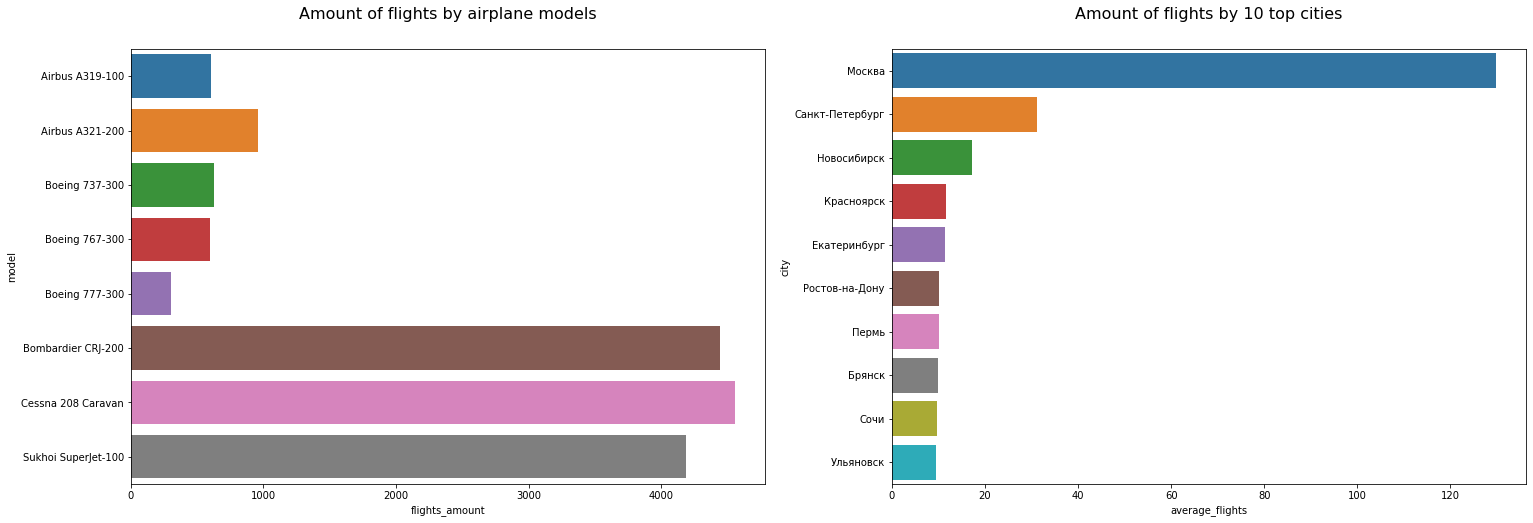

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(25,8))
sns.barplot(data = query_1, x='flights_amount', y='model', ax=ax[0])

sns.barplot(data = q3_top10, x='average_flights', y='city',  ax=ax[1])

ax[0].set_title('Amount of flights by airplane models', fontsize=16, pad = 30)

ax[1].set_title('Amount of flights by 10 top cities', fontsize=16, pad = 30)

plt.show()

Text(0.5, 1.0, 'Flights bby city')

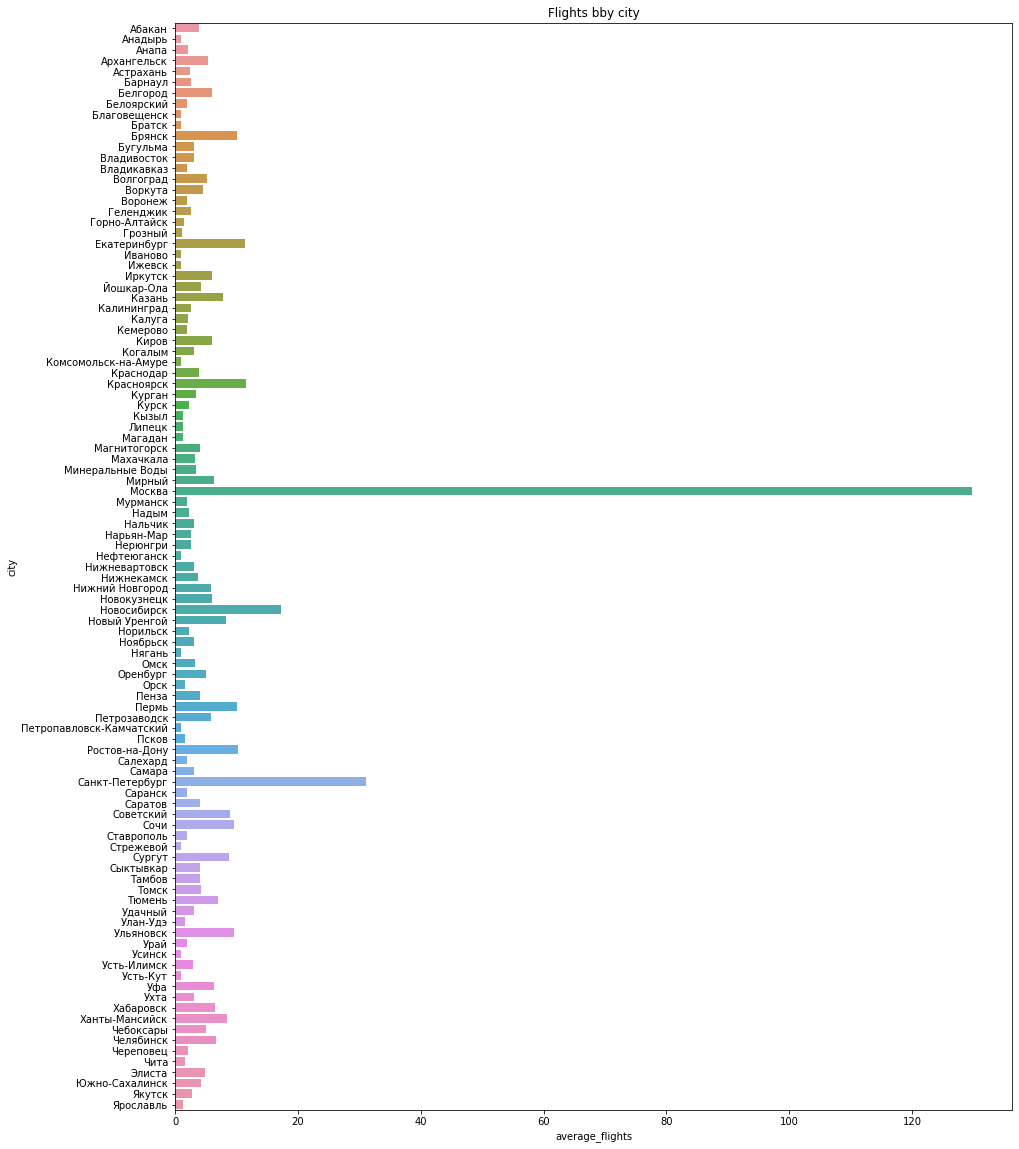

In [16]:
plt.figure(figsize=(15,20))
city = sns.barplot(data = query_3, x='average_flights', y='city')
city.set_title('Flights bby city')

Because Boeings and Airbuses are using more for international flights and smaller aircraft for domestic flights we have small amount of flights. Plus many cities you can visit using another transport like bus and train which are cheaper then planes or people can travel by car. That means - don't need big planes. It is just thoughts build on experience. Plus we need to know how all this work inside.</div>

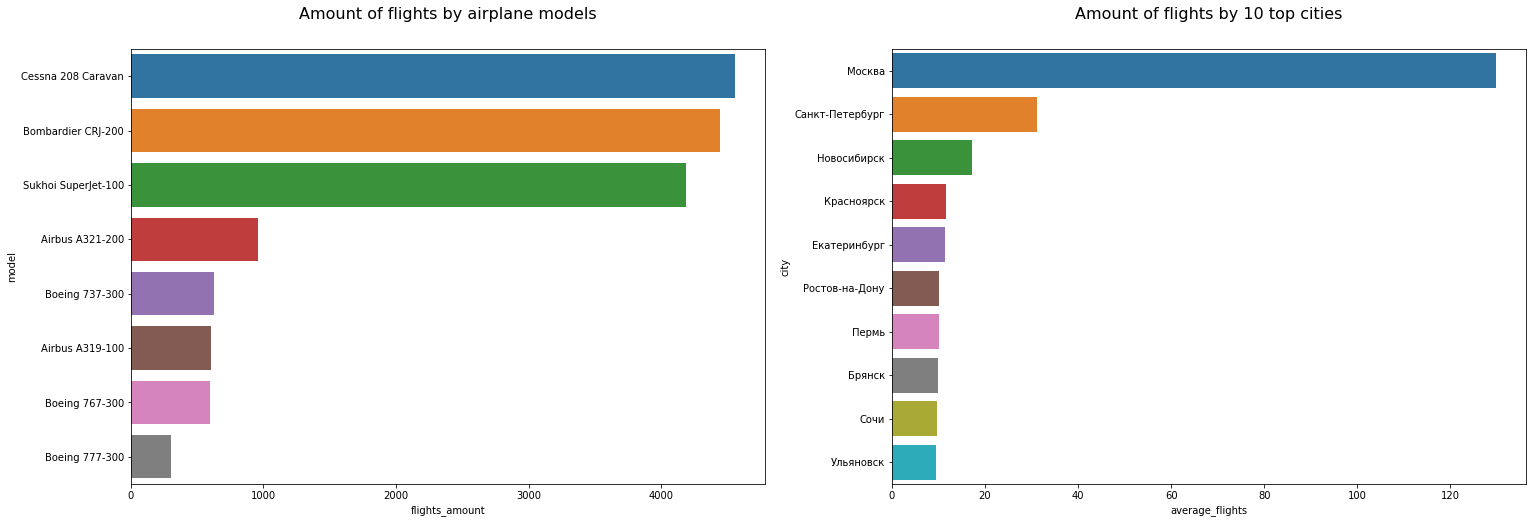

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(25,8))
sns.barplot(data = query_1.sort_values(by = 'flights_amount', ascending = False), x='flights_amount', y='model', ax=ax[0])

sns.barplot(data = q3_top10, x='average_flights', y='city',  ax=ax[1])

ax[0].set_title('Amount of flights by airplane models', fontsize=16, pad = 30)

ax[1].set_title('Amount of flights by 10 top cities', fontsize=16, pad = 30)

plt.show()

## Conclusion<a href='conclusion'></a>
1. We have two datasets.
2. No missing data.
3. No duplicates.
4. In dataset query_3 round average flights (decimals=2).
5. The biggest number of flights in Moscow. But we don't have information which kind of flights are they. It could be a stop in airport for couple hours(ex. reloading)
6. Most of the cities in "Top 10" are big cities with population 1,000,000+
7. Three airplanes' models has the biggest amount af flights.


